<a href="https://colab.research.google.com/github/samyamaryal12/YouTube-Clone/blob/main/Mentorness_Mobile_Prediction_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load Data**

In [ ]:
#Assuming 'train.csv' and 'test.csv' are your datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

**Exploratory Data Analysis(EDA)**

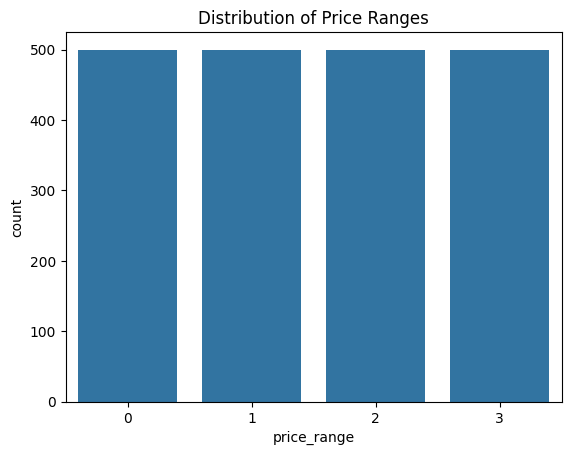

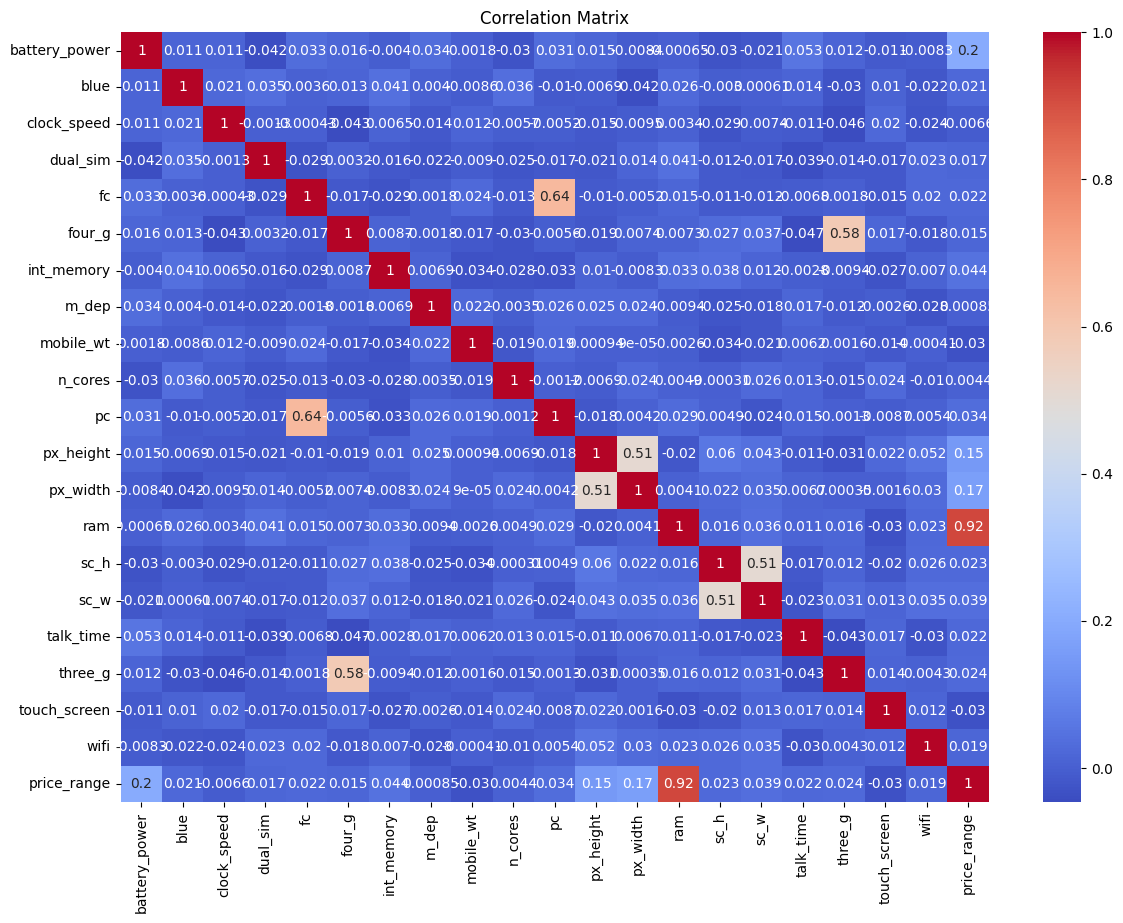

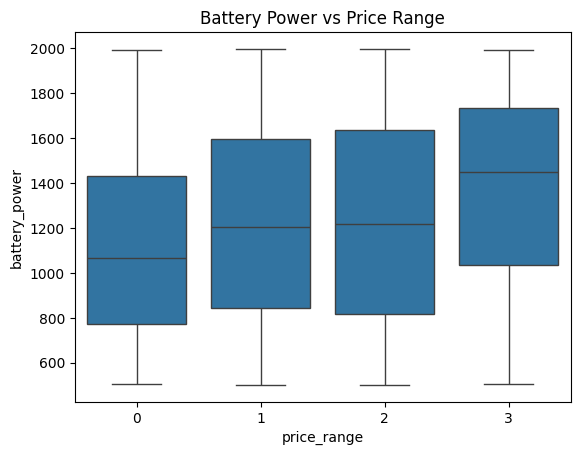

In [ ]:
# Explore dataset
train_data.head()
train_data.describe()

# Visualize distribution of target variable (price_range)
sns.countplot(x='price_range', data=train_data)
plt.title('Distribution of Price Ranges')
plt.show()

# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore features by price range
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.title('Battery Power vs Price Range')
plt.show()

**Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
!pip install scikit-learn


In [ ]:
# Split features and target variable
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


**Model Training and Evaluation**

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



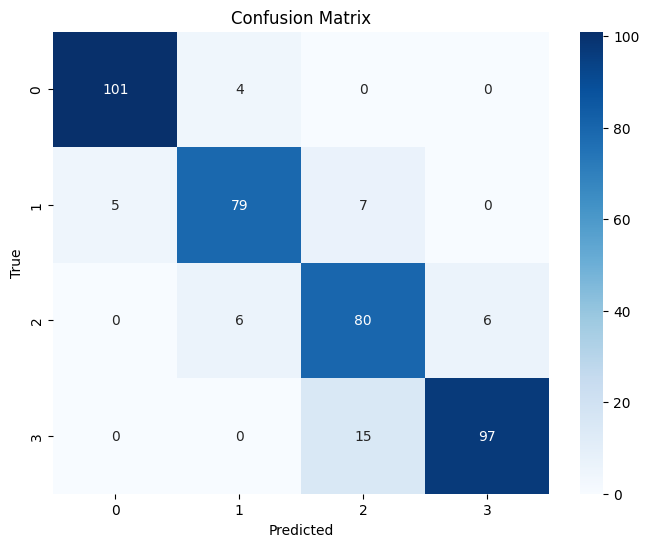

In [ ]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred = rf_classifier.predict(X_val_scaled)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Visualization**

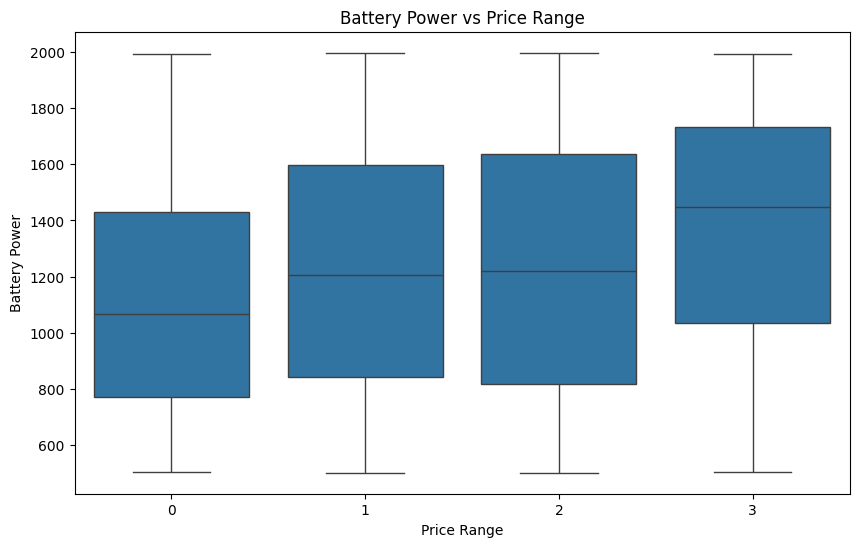

In [ ]:
# Example plot: Battery Power vs Price Range
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


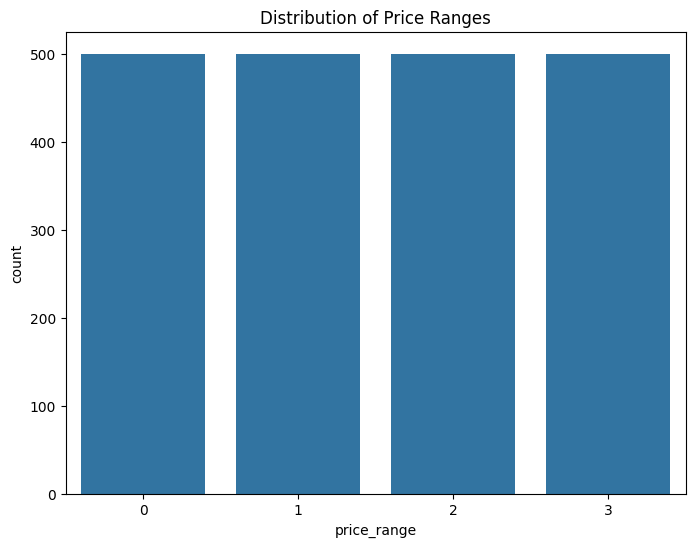

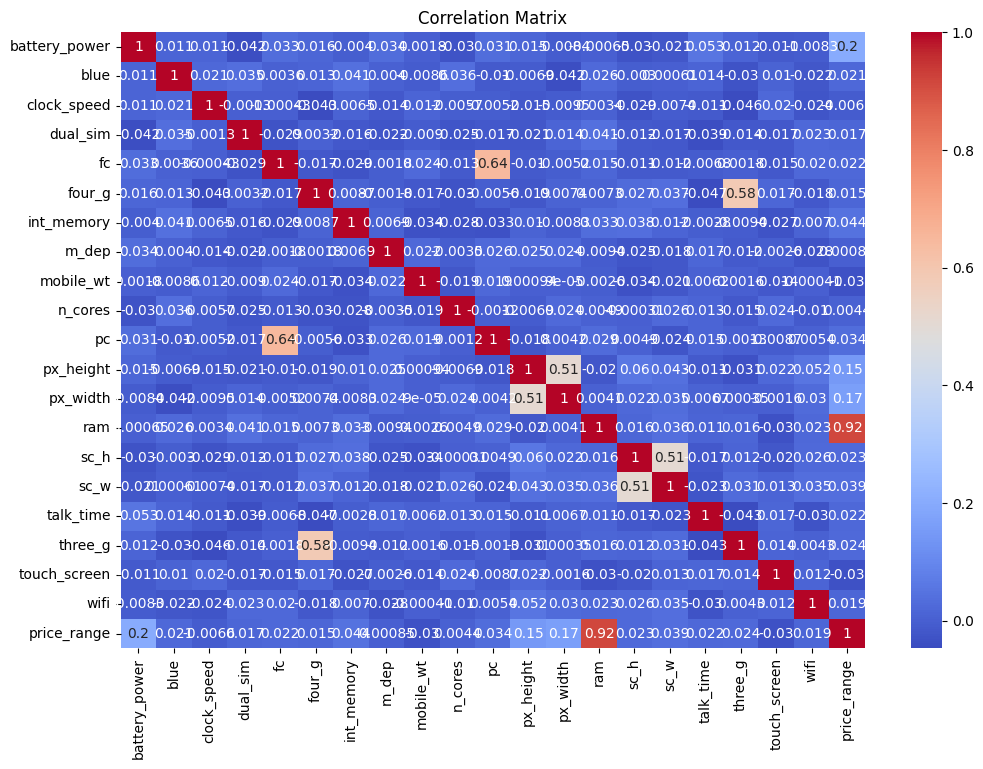

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



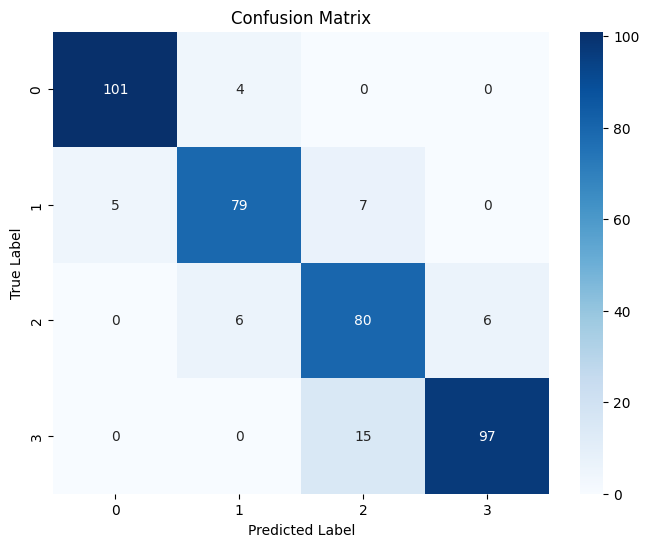

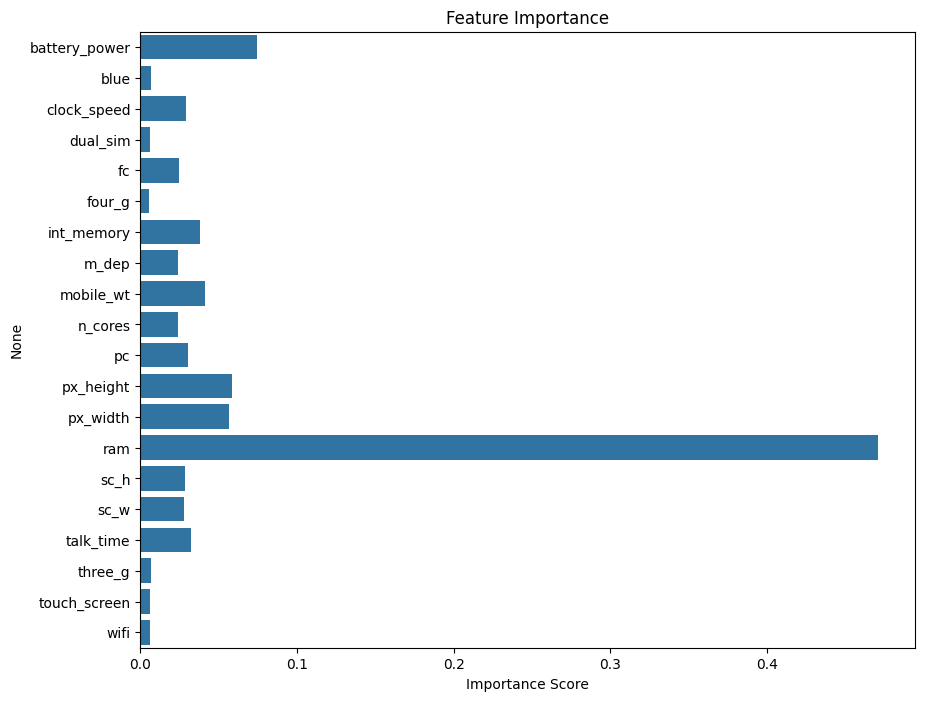

Cross-validation Scores: [0.8725 0.8775 0.8975 0.875  0.8675]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

# Data Loading
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data Preprocessing
train_data.dropna(inplace=True)  # Handle missing values
# Handle outliers (if required)

# EDA
# Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train_data)
plt.title('Distribution of Price Ranges')
plt.show()

# Explore feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Training and Evaluation
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred = rf_classifier.predict(X_val_scaled)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save trained model
joblib.dump(rf_classifier, 'mobile_price_classifier_model.pkl')

# Feature Importance
feature_importance = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

# Cross-validation for model robustness
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f'Cross-validation Scores: {cv_scores}')

# Deployment Instructions (if applicable)
# Include instructions for deploying the model in a real-time environment

# End of Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
data = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')

# Assuming 'price_range' is the target variable to predict
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

# Save the trained model to a file
joblib.dump(rf_classifier, 'mobile_price_classifier_model.pkl')


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Confusion Matrix:
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


['mobile_price_classifier_model.pkl']

New Datasets Predicitions

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Confusion Matrix:
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


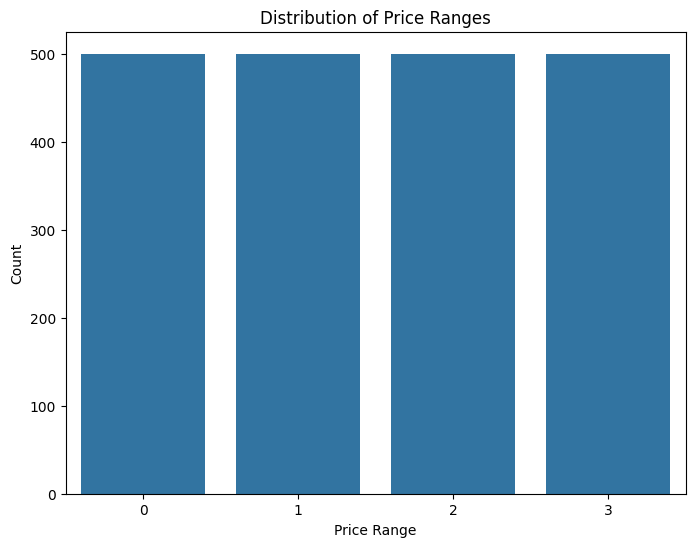

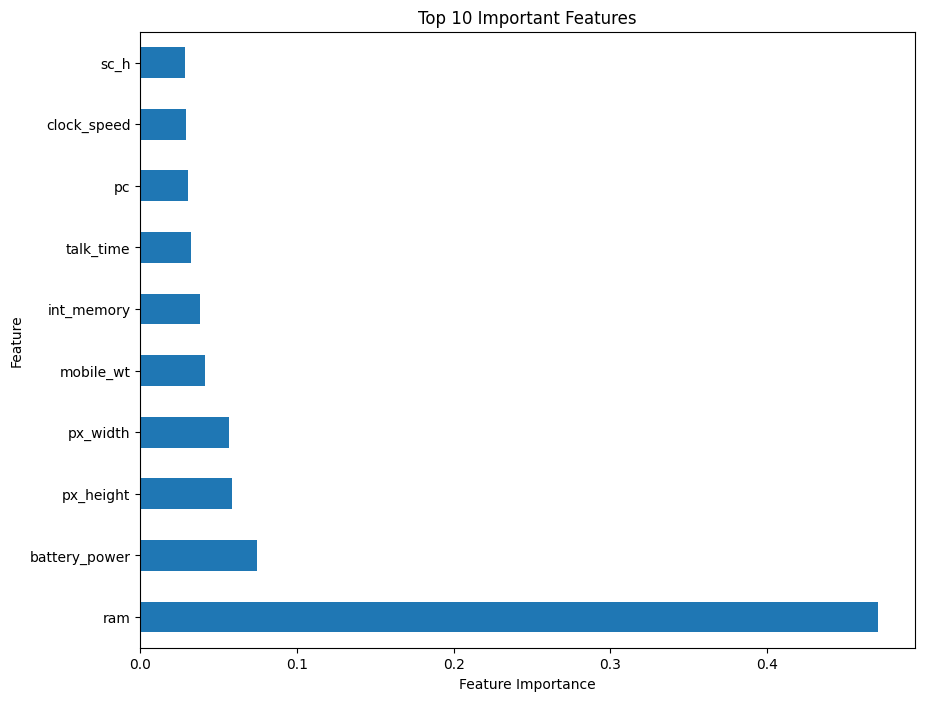

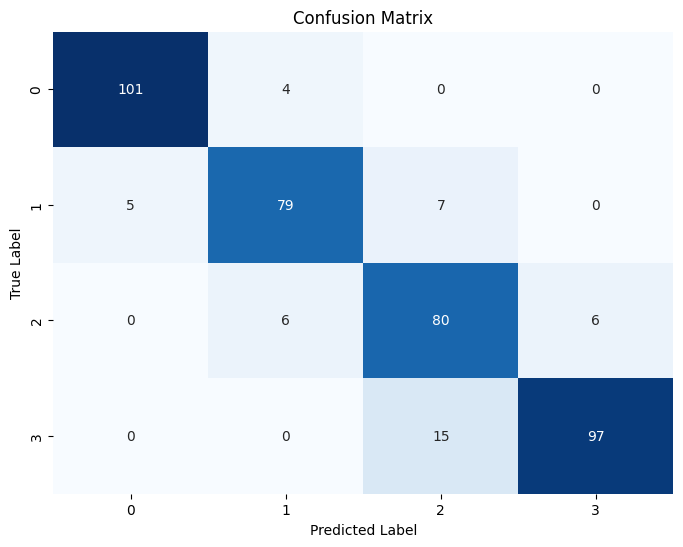


Prediction for New Data:
Predicted Price Range: 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
data = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')
# Assuming 'price_range' is the target variable to predict
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

# Save the trained model to a file
joblib.dump(rf_classifier, 'mobile_price_classifier_model.pkl')

# Visualizations
# Distribution of 'price_range'
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=data)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Feature Importance Plot
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create new data row for prediction (similar format to original data)
new_data = {
    'battery_power': [1500],
    'blue': [1],
    'clock_speed': [2.0],
    'dual_sim': [1],
    'fc': [8],
    'four_g': [1],
    'int_memory': [16],
    'm_dep': [0.8],
    'mobile_wt': [160],
    'n_cores': [6],
    'pc': [12],
    'px_height': [800],
    'px_width': [1200],
    'ram': [3000],
    'sc_h': [12],
    'sc_w': [6],
    'talk_time': [20],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df)

# Make predictions on the new data
new_data_pred = rf_classifier.predict(new_data_scaled)
print('\nPrediction for New Data:')
print(f'Predicted Price Range: {new_data_pred[0]}')
